In [8]:
import json
 
path ='data/1.Training/라벨링데이터/' # 경로 지정
file_str = path + '글짓기/글짓기_고등_1학년_ESSAY_33982.json'  # 파일명 

with open(file_str) as f:      # json파일 열기 
    text = json.load(f)

text

{'paragraph': [{'paragraph_txt': '익숙함에 속아 소중함을 잊지말자라는 명언은 매우 유명한 명언이다.#@문장구분# 난 이 명언의 내용과 같은 것을 겪은 적이있다.#@문장구분# 중학교 때였다.#@문장구분# 초등학교때부터 알고 지내였던 7년 지기 친구가 있었다.#@문장구분# 이 친구와는 중학교도 같이 올라와 계속 같이 다녔다.#@문장구분# 이 친구와 둘이서만 다닌 것이 아니라 한8명 정도가 같이 다녔다.#@문장구분# 근데 난 이친구와 가장 친하고 이 친구가 가장 소중하였지만 다른 친구들과 더 많이 놀고, 7년 동안 이 친구와 다녔어서 익숙했다.#@문장구분# 이 친구에게는 짜증을 더 많이 내었고, 분풀이도 하곤 했던 것 같다.#@문장구분# 그래서 많이 싸웠던 것 같다.#@문장구분# 그리고 이 친구의 성격을 너무 잘알아서 내가 고민을 말해도 답은 정해져 있었다.#@문장구분# 그래서 그랬던 것이였던건지..#@문장구분# 다른 친구에게 더욱 더 내 속마음을 잘 털어놓게 되었고, 내 7년지기친구는 나의 속마음들을 잘 알지 못했다.#@문장구분# 그래서 다른 친구와 7년지기 친구가 같이 있었는데 7년 지기 친구만 모르는 이야기여서 그 친구가 서운해 했던 적도 있었다.#@문장구분# 그리고 어느날 7년 지기 친구가 나에게 다른 친구의 뒷담화를 하였다.#@문장구분# 그 친구는 날 너무 믿어서 말해 주었겠지만 나는 다른 친구와도 친했던 사이이고, 7년지기 친구는 날 다 이해해줄꺼라는 잘못된 생각으로 그 친구가 한 말들을 다른 친구에게 하고 말았다.#@문장구분# 그래서 그 친구는 다른사람도 아닌 7년지기인 내가 말했기 때문에 더 배신감이 들었을테고 상처도 더 많이 받았을 것이다.#@문장구분# 이 사건을 통해 그 친구와 멀어지게 되었다.#@문장구분# 난 이 사건을 겪고 익숙함에 속아 소중함을 잊지말자는 명언에 공감하게 되었다.#@문장구분# 그리고 그 친구의 소중함을 까닭과 다시 다가가기위해 사과도 해보고 지금까지 나와 친구가 주고 받았던 편지 대화내용을 되새겼다.

In [44]:
from os import listdir
from tqdm import tqdm
import pandas as pd

path ='data/1.Training/라벨링데이터/'  # 맞는 경로를 지정해줘야 함 

# 라벨링 데이터 가져오는 함수 
def get_data(data, path):
    ids, grades, etypes, essay, levels, scores =[], [], [], [], [], []  # 빈 리스트 생성 
    for row in tqdm(data.itertuples(), total=data.shape[0]):  # 진행상황 확인을 위한 tqdm, data frame 값을 빠르게 가져오기 위한 itertuples 
        file_str = path + row.file_name                       # 파일명 
        
        with open(file_str) as f:      # json파일 열기
            text = json.load(f)
        
        paragraph_score = text['score']['paragraph_score'][0]['paragraph_scoreT_avg'] # paragraph score data 가져오기 
        essay_score = text['score']['essay_scoreT_avg']                               # essay score data 가져오기 
        score = paragraph_score + essay_score    # score 더하기 

        ids.append(text['info']['essay_id'])         # essay_id
        grades.append(text['rubric']['essay_grade']) # 학년 
        etypes.append(text['info']['essay_type'])    # 글 종류
        essay.append(text['paragraph'][0]['paragraph_txt'])
        levels.append(text['info']['essay_level'])   # 각 글의 level
        scores.append(score)                         # score data 

    df= pd.DataFrame({'id': ids, 'grade': grades, 'etype':etypes, 'essay':essay, 'levels': levels, 'scores': scores})  # 리스트로 dataframe 만들기 
    return df 
    
text_type = ['글짓기','대안제시', '설명글', '주장', '찬성반대']   # 글 5가지 종류 
main_df = pd.DataFrame()    # 빈 데이터프레임 

# 파일 리스트로부터 모든 데이터 가져오기 
for i in range(5):
    paths = path + text_type[i]+'/'   # 경로 지정 
    fileNameList = listdir(paths)      # 해당 경로에 포함된 파일 리스트를 모두 가져옴

    df= pd.DataFrame(fileNameList, columns=['file_name'])     # 파일 리스트 -> 데이터 프레임화 
    df=df.astype('string')                                    # df type string 으로 변경 
    
    cr = df['file_name'].str.contains('중등')                 # 파일명에 '중등'이 포함되어있는 파일만 filtering
    data = df[cr]

    sub_df = get_data(data, paths)                          # 데이터 가져오는 함수
    main_df = pd.concat([main_df, sub_df])            # main_labels에 누적하여 더하기 


100%|██████████| 2721/2721 [00:00<00:00, 5143.68it/s]


/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # Remove the CWD from sys.path while we load stuff.


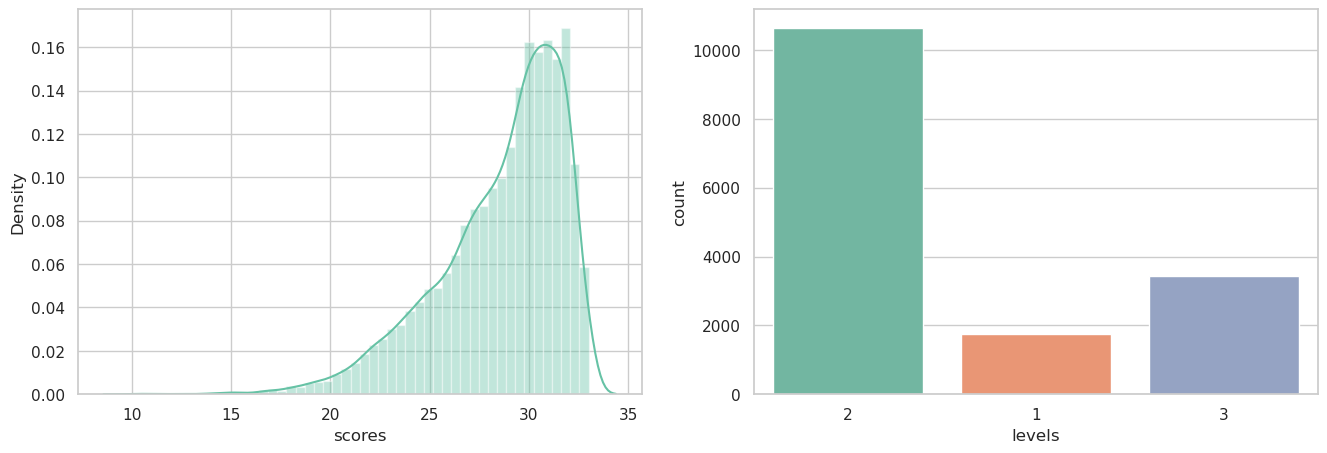

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style='whitegrid', font_scale=1)  # seaborn style 지정 
sns.set_palette('Set2', n_colors=10)            # seaborn colar pallete 지정 

fig, ax = plt.subplots(1,2, figsize=(16,5))

sns.distplot(main_df['scores'], ax=ax[0]);   # score 분포 확인 
sns.countplot(x = 'levels',data = main_df, ax=ax[1]);  # levels 분포 확인 

In [65]:
train = main_df.set_index('id')
#test = test.set_index('id')

tr_idx = train.index
#te_idx = test.index

#temp = pd.concat([train, test])
#temp.shape
tr_idx.shape


(15834,)

In [67]:
train['grade']= train['grade'].str.replace('학년|중등_', '')
train['essay']= train['essay'].str.replace('#@문장구분#', '')

/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [68]:
train = pd.get_dummies(train, columns=['etype']) #원-핫 인코딩

col = {'etype_글짓기': '글짓기', 
       'etype_대안제시': '대안제시',
       'etype_설명글': '설명글',
       'etype_주장': '주장',
       'etype_찬성반대': '찬성반대'}
train.rename(columns=col, inplace=True)

train.head()

,grade,essay,levels,scores,글짓기,대안제시,설명글,주장,찬성반대
id,,,,,,,,,
ESSAY_82372,2,미래의 나는 돈이 많았으면 좋겠다. 세상만사 돈으로 안되는 게 없다고 생각하기 떄문...,2,31.555553,1,0,0,0,0
ESSAY_60243,1,현재 일본이나 프랑스 같은 나라는 미래를 위해서 바다속에서 살수 있는 해저도시를 개...,2,24.283333,1,0,0,0,0
ESSAY_56311,1,나는 미래에 우리는 이미 다른 행성으로 이주에 있을 것이라 생각한다 계속되는 환경의...,2,28.649999,1,0,0,0,0
ESSAY_65270,2,제 미래는 제가 정해가는 것이라고 생각합니다. 앞으로 제가 뭘하고 싶은지도 사실 저...,2,30.222221,1,0,0,0,0
ESSAY_58890,2,저는 제가 10년 후면 많은 옷이 있는 집에서 살고 있을 것이라고 생각합니다. 물론...,2,25.629630,1,0,0,0,0


In [243]:
import tensorflow as tf
from transformers import AutoTokenizer, TFBertModel, BertModel, AutoModel

# 토크나이저 
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")
# 모델
model = TFBertModel.from_pretrained("klue/bert-base", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'bert.embeddings.position_ids', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

In [245]:
def gen_emb(data):
    for row in tqdm(train.itertuples()):
        inputs = tokenizer(row.essay, return_tensors='tf', truncation=True)
        outputs = model(inputs)
        cls_embeddings = outputs.last_hidden_state[:,0]
        yield cls_embeddings 
        
cls_emb = list(gen_emb(train))
cls_emb_df = pd.DataFrame(np.squeeze(np.array(cls_emb), axis=1))

7it [00:02,  2.47it/s]


KeyboardInterrupt: 

In [249]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)   # 200은 임의로 선정한 값
emb_svd = svd.fit_transform(cls_emb_df)
df_emb = pd.DataFrame(emb_svd)

df = pd.concat([train, df_emb], axis=1)
df.drop(columns=['essay'], inplace=True) # text data는 임베딩 값으로 대체되므로 삭제 

df.head()

,id,grade,levels,scores,글짓기,대안제시,설명글,주장,찬성반대,0,...,190,191,192,193,194,195,196,197,198,199
0,ESSAY_82372,2,2,31.555553,1,0,0,0,0,20.897850,...,0.110156,0.268464,-0.271161,0.393484,0.432711,0.132732,0.347419,0.131399,0.309979,0.063933
1,ESSAY_60243,1,2,24.283333,1,0,0,0,0,19.156561,...,0.229825,-0.537619,-0.345497,-0.022329,-0.937783,0.123686,1.080350,-0.123654,0.340281,-0.853691
2,ESSAY_56311,1,2,28.649999,1,0,0,0,0,18.035656,...,0.095485,0.538590,0.484807,-0.424972,0.181786,-0.673020,0.100999,-0.636725,-0.032867,0.282490
3,ESSAY_65270,2,2,30.222221,1,0,0,0,0,21.048429,...,-0.182282,-0.133597,0.339190,0.328119,0.541485,0.296238,0.595676,-0.121581,-0.131260,-0.188037
4,ESSAY_58890,2,2,25.629630,1,0,0,0,0,21.248621,...,-0.062221,-0.138606,0.032324,0.094243,-0.674070,0.332720,-0.442933,-0.482193,0.197685,-0.079399


In [85]:
train.reset_index(inplace=True)

In [88]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

# LGBM Regressor
from lightgbm import LGBMRegressor

# train_test_split
from sklearn.model_selection import train_test_split

# Evaluation Score
from sklearn.metrics import mean_squared_error

df.set_index('id', inplace=True)
df_x = df.loc[tr_idx]
y = round(df_x['scores'], 2)
X = df_x.drop(columns=['scores'])

X['grade']=X['grade'].astype('int')
X['levels']=X['levels'].astype('int')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# random sampler
sampler = TPESampler(seed=10)

# define function
def objective(trial):
    lgbm_param = {
        'objective': 'regression',
        'verbose': -1,
        'metric': 'mse', 
        'num_leaves': trial.suggest_int('num_leaves', 2, 1024, step=1, log=True), 
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 10.0),
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    # Generate model
    model_lgbm = LGBMRegressor(**lgbm_param)
    model_lgbm = model_lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], 
                           verbose=0, early_stopping_rounds=25)
                           
    # 평기 지표                         
    MSE = mean_squared_error(y_val, model_lgbm.predict(X_val))
    return MSE

optuna_lgbm = optuna.create_study(direction='minimize', sampler=sampler)

# n_trials의 경우 optuna를 몇번 실행하여 hyper parameter를 찾을 것인지를 정한다.
optuna_lgbm.optimize(objective, n_trials=50)

lgbm_trial = optuna_lgbm.best_trial
lgbm_trial_params = lgbm_trial.params
lgbm_trial_params

[I 2024-08-18 15:01:07,426] A new study created in memory with name: no-name-943864ba-9676-4102-9c00-1d00854615f8
/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages

{'num_leaves': 430,
 'colsample_bytree': 0.7057639520222879,
 'reg_alpha': 0.9312273774100982,
 'reg_lambda': 2.0544542979746745,
 'max_depth': 10,
 'learning_rate': 0.009213975650469653,
 'n_estimators': 2820,
 'min_child_samples': 36,
 'subsample': 0.5564133640301012}

In [254]:
df = pd.concat([train, cls_emb_df], axis=1)
df.drop(columns=['essay'], inplace=True) # text data는 임베딩 값으로 대체되므로 삭제 

df.head()

,id,grade,levels,scores,글짓기,대안제시,설명글,주장,찬성반대,0,...,758,759,760,761,762,763,764,765,766,767
0,ESSAY_82372,2,2,31.555553,1,0,0,0,0,0.781151,...,0.571354,0.699148,-2.403193,-1.206916,-0.421972,-0.700756,-0.469156,1.418350,-0.197121,0.671996
1,ESSAY_60243,1,2,24.283333,1,0,0,0,0,-0.043294,...,0.267751,0.258511,-0.410483,-0.785313,-0.791003,-0.578809,0.215255,0.374760,-1.299386,0.437878
2,ESSAY_56311,1,2,28.649999,1,0,0,0,0,-0.127101,...,0.977346,0.334498,-1.661340,-1.531678,-0.013431,-0.714526,0.258342,-0.248667,-0.552674,1.000728
3,ESSAY_65270,2,2,30.222221,1,0,0,0,0,0.302371,...,0.630394,0.461910,-2.074726,-0.850424,0.496049,-0.766436,0.978255,0.291051,-0.223626,0.198549
4,ESSAY_58890,2,2,25.629630,1,0,0,0,0,-0.332192,...,1.223264,0.917403,-1.507903,-1.203790,0.139778,-1.107789,0.971889,0.306426,-0.592672,0.962773


In [255]:
df.set_index('id', inplace=True)
df_x = df.loc[tr_idx]
y = round(df_x['scores'], 2)
X = df_x.drop(columns=['scores'])

X['grade']=X['grade'].astype('int')
X['levels']=X['levels'].astype('int')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# random sampler
sampler = TPESampler(seed=10)

# define function
def objective(trial):
    lgbm_param = {
        'objective': 'regression',
        'verbose': -1,
        'metric': 'mse', 
        'num_leaves': trial.suggest_int('num_leaves', 2, 1024, step=1, log=True), 
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 10.0),
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    # Generate model
    model_lgbm = LGBMRegressor(**lgbm_param)
    model_lgbm = model_lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], 
                           verbose=0, early_stopping_rounds=25)
                           
    # 평기 지표                         
    MSE = mean_squared_error(y_val, model_lgbm.predict(X_val))
    return MSE

optuna_lgbm = optuna.create_study(direction='minimize', sampler=sampler)

# n_trials의 경우 optuna를 몇번 실행하여 hyper parameter를 찾을 것인지를 정한다.
optuna_lgbm.optimize(objective, n_trials=50)

lgbm_trial = optuna_lgbm.best_trial
lgbm_trial_params = lgbm_trial.params
lgbm_trial_params

[I 2024-08-18 21:58:08,229] A new study created in memory with name: no-name-11651c2f-af77-43c5-bee2-8eb3549c65ad
/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages

{'num_leaves': 456,
 'colsample_bytree': 0.9290107316243746,
 'reg_alpha': 0.5313932106409376,
 'reg_lambda': 3.610472693767623,
 'max_depth': 15,
 'learning_rate': 0.001930447102574424,
 'n_estimators': 2427,
 'min_child_samples': 74,
 'subsample': 0.5443001187446584}

In [146]:
path ='data/2.Validation/라벨링데이터/'  # 맞는 경로를 지정해줘야 함

# 라벨링 데이터 가져오는 함수 
def get_data(data, path):
    ids, grades, etypes, essay, levels, scores =[], [], [], [], [], []  # 빈 리스트 생성 
    for row in tqdm(data.itertuples(), total=data.shape[0]):  # 진행상황 확인을 위한 tqdm, data frame 값을 빠르게 가져오기 위한 itertuples 
        file_str = path + row.file_name                       # 파일명 
        
        with open(file_str) as f:      # json파일 열기
            text = json.load(f)
        
        paragraph_score = text['score']['paragraph_score'][0]['paragraph_scoreT_avg'] # paragraph score data 가져오기 
        essay_score = text['score']['essay_scoreT_avg']                               # essay score data 가져오기 
        score = paragraph_score + essay_score    # score 더하기 

        ids.append(text['info']['essay_id'])         # essay_id
        grades.append(text['rubric']['essay_grade']) # 학년 
        etypes.append(text['info']['essay_type'])    # 글 종류
        essay.append(text['paragraph'][0]['paragraph_txt'])
        levels.append(text['info']['essay_level'])   # 각 글의 level
        scores.append(score)                         # score data 

    df= pd.DataFrame({'id': ids, 'grade': grades, 'etype':etypes, 'essay':essay, 'levels': levels, 'scores': scores})  # 리스트로 dataframe 만들기 
    return df 
    
text_type = ['글짓기','대안제시', '설명글', '주장', '찬성반대']   # 글 5가지 종류 
test_df = pd.DataFrame()    # 빈 데이터프레임 

# 파일 리스트로부터 모든 데이터 가져오기 
for i in range(5):
    paths = path + text_type[i]+'/'   # 경로 지정 
    fileNameList = listdir(paths)      # 해당 경로에 포함된 파일 리스트를 모두 가져옴

    df= pd.DataFrame(fileNameList, columns=['file_name'])     # 파일 리스트 -> 데이터 프레임화 
    df=df.astype('string')                                    # df type string 으로 변경 
    
    cr = df['file_name'].str.contains('중등')                 # 파일명에 '중등'이 포함되어있는 파일만 filtering
    data = df[cr]

    sub_df = get_data(data, paths)                          # 데이터 가져오는 함수
    test_df = pd.concat([test_df, sub_df])            # main_labels에 누적하여 더하기 

100%|██████████| 341/341 [00:00<00:00, 19954.21it/s]


In [274]:
test = test_df.set_index('id')

te_idx = test.index

#temp = pd.concat([train, test])
te_idx.shape

(1988,)

In [275]:
test['grade']= test['grade'].str.replace('학년|중등_', '')
test['essay']= test['essay'].str.replace('#@문장구분#', '')

/home/leeus/miniconda3/envs/hyper/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [276]:
test = pd.get_dummies(test, columns=['etype']) #원-핫 인코딩

col = {'etype_글짓기': '글짓기', 
       'etype_대안제시': '대안제시',
       'etype_설명글': '설명글',
       'etype_주장': '주장',
       'etype_찬성반대': '찬성반대'}
test.rename(columns=col, inplace=True)

test.head()

,grade,essay,levels,scores,글짓기,대안제시,설명글,주장,찬성반대
id,,,,,,,,,
ESSAY_70614,2,"저는 미래에 성공한 직장인이 되고 싶습니다. 지금 원하는 직업은 정확히 없고, 자주...",2,29.277780,1,0,0,0,0
ESSAY_32896,2,"지금은 내가 비록 공부를 매우 열심히 하고 있지는 않지만, 앞으로는 지금보다 좀 더...",2,26.481481,1,0,0,0,0
ESSAY_71631,1,미래에는 지구가 환경오염이 심각해져 생물이 살 수 없게 될 것입니다. 그래서 지구인...,2,32.216667,1,0,0,0,0
ESSAY_58832,2,나는 나의 노래로 인해 많은 사람들에게 위로가 되고 재미를 주는 가수가 되고 싶다....,2,30.888888,1,0,0,0,0
ESSAY_81098,2,저는 경찰이 돼서 많은 사람을 도와주고 싶습니다. 아무리 힘든 일이라도 사람들을 안...,2,27.129632,1,0,0,0,0


In [150]:
def gen_emb(data):
    for row in tqdm(test.itertuples()):
        inputs = tokenizer(row.essay, return_tensors='tf', truncation=True)
        outputs = model(inputs)
        cls_embeddings = outputs.last_hidden_state[:,0]
        yield cls_embeddings 
        
cls_emb_test = list(gen_emb(test))
cls_emb_test_df = pd.DataFrame(np.squeeze(np.array(cls_emb_test), axis=1))

1988it [23:21,  1.42it/s]


In [165]:
test.reset_index(inplace=True)
svd = TruncatedSVD(n_components=200)   # 200은 임의로 선정한 값
emb_svd_test = svd.fit_transform(cls_emb_test_df)
df_emb_test = pd.DataFrame(emb_svd_test)

df_test = pd.concat([test, df_emb_test], axis=1)
df_test.drop(columns=['essay'], inplace=True) # text data는 임베딩 값으로 대체되므로 삭제 

df_test.head()

,id,grade,levels,scores,글짓기,대안제시,설명글,주장,찬성반대,0,...,190,191,192,193,194,195,196,197,198,199
0,ESSAY_70614,2,2,29.277780,1,0,0,0,0,21.788902,...,0.353117,-0.524252,-0.264668,0.033175,0.109890,0.349235,-0.183014,0.191277,0.253258,-0.153871
1,ESSAY_32896,2,2,26.481481,1,0,0,0,0,20.710081,...,-0.269430,-0.029474,-0.308991,-0.024886,0.007304,0.567750,0.297199,-0.299989,0.096351,-0.284571
2,ESSAY_71631,1,2,32.216667,1,0,0,0,0,17.440083,...,0.471995,-0.158564,-0.320980,0.351958,-0.158247,-0.526200,0.124367,0.673695,-0.658792,0.032583
3,ESSAY_58832,2,2,30.888888,1,0,0,0,0,21.278944,...,0.057352,0.150541,0.139815,-0.319532,0.319791,0.294599,0.002035,-0.391779,-0.171230,0.388502
4,ESSAY_81098,2,2,27.129632,1,0,0,0,0,20.551693,...,0.464263,-0.443762,-0.249954,-0.175755,-0.068545,0.018461,-0.519931,-0.422126,0.155968,-0.059516


In [177]:
print(len(te_idx))
df_test

1988


,id,grade,levels,scores,글짓기,대안제시,설명글,주장,찬성반대,0,...,190,191,192,193,194,195,196,197,198,199
0,ESSAY_70614,2,2,29.277780,1,0,0,0,0,21.788902,...,0.353117,-0.524252,-0.264668,0.033175,0.109890,0.349235,-0.183014,0.191277,0.253258,-0.153871
1,ESSAY_32896,2,2,26.481481,1,0,0,0,0,20.710081,...,-0.269430,-0.029474,-0.308991,-0.024886,0.007304,0.567750,0.297199,-0.299989,0.096351,-0.284571
2,ESSAY_71631,1,2,32.216667,1,0,0,0,0,17.440083,...,0.471995,-0.158564,-0.320980,0.351958,-0.158247,-0.526200,0.124367,0.673695,-0.658792,0.032583
3,ESSAY_58832,2,2,30.888888,1,0,0,0,0,21.278944,...,0.057352,0.150541,0.139815,-0.319532,0.319791,0.294599,0.002035,-0.391779,-0.171230,0.388502
4,ESSAY_81098,2,2,27.129632,1,0,0,0,0,20.551693,...,0.464263,-0.443762,-0.249954,-0.175755,-0.068545,0.018461,-0.519931,-0.422126,0.155968,-0.059516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,ESSAY_85367,3,2,31.166666,0,0,0,0,1,21.002632,...,-0.289730,0.089722,-0.437836,-0.048848,0.203325,0.015683,0.122170,-0.572670,0.039901,0.562038
1984,ESSAY_59142,3,2,20.600001,0,0,0,0,1,21.248400,...,0.055677,-0.173532,-0.210750,0.406939,0.155337,0.064425,0.257576,-0.371728,0.003240,-0.181494
1985,ESSAY_54253,3,2,29.566667,0,0,0,0,1,21.909370,...,0.158623,0.648132,-0.273930,-0.187484,0.190166,-0.521994,0.245039,0.031452,-0.435885,0.283533
1986,ESSAY_58170,2,2,28.933333,0,0,0,0,1,21.517054,...,0.009546,-0.139748,-0.495097,0.408054,0.261902,-0.411919,-0.428359,0.191701,0.079319,-0.030078


In [183]:
# Modeling fit
lgbm = LGBMRegressor(**lgbm_trial_params)
lgbm_study = lgbm.fit(X_train, y_train)

#df_test.set_index('id', inplace=True)
test_ = df_test.loc[te_idx]
y_test = round(test_['scores'], 2)
X_test = test_.drop(columns=['scores'])

X_test['grade']=X_test['grade'].astype('int')
X_test['levels']=X_test['levels'].astype('int')

pred = lgbm_study.predict(X_test)
predict_df = pd.DataFrame({'pred':pred, 'target': y_test})
predict_df['error']=abs(predict_df['target']-predict_df['pred'])

In [184]:
predict_df

,pred,target,error
id,,,
ESSAY_70614,29.805891,29.28,0.525891
ESSAY_32896,28.716029,26.48,2.236029
ESSAY_71631,27.148662,32.22,5.071338
ESSAY_58832,29.418030,30.89,1.471970
ESSAY_81098,29.016831,27.13,1.886831
...,...,...,...
ESSAY_85367,29.034124,31.17,2.135876
ESSAY_59142,28.383130,20.60,7.783130
ESSAY_54253,28.723173,29.57,0.846827


In [216]:
from sklearn.metrics import mean_squared_error, f1_score
print(mean_squared_error(predict_df['target'], predict_df['pred']))
print(f1_score(predict_df['target'].astype('int'), predict_df['pred'].astype('int'),average='macro'))

10.266214294393777
0.03284865972454772


<AxesSubplot:ylabel='error'>

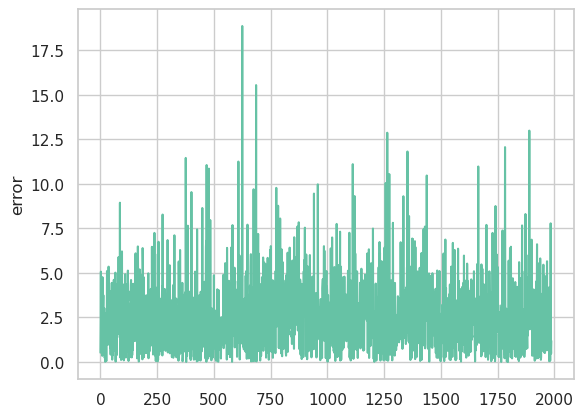

In [187]:
sns.lineplot(data=predict_df, x=range(len(predict_df)), y='error')

<AxesSubplot:xlabel='pred', ylabel='target'>

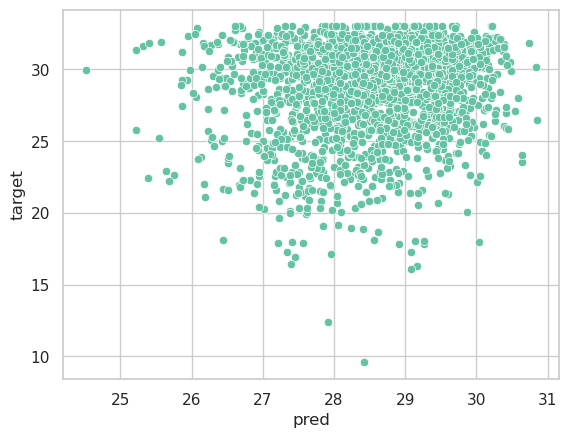

In [191]:
sns.scatterplot(data=predict_df,x=predict_df['pred'],y=predict_df['target'])

In [279]:
test.reset_index(inplace=True)
df_test = pd.concat([test, cls_emb_test_df], axis=1)
df_test.drop(columns=['essay'], inplace=True) # text data는 임베딩 값으로 대체되므로 삭제 

df_test.head()

,id,grade,levels,scores,글짓기,대안제시,설명글,주장,찬성반대,0,...,758,759,760,761,762,763,764,765,766,767
0,ESSAY_70614,2,2,29.277780,1,0,0,0,0,0.341852,...,0.495973,0.924157,-1.843464,-1.061975,0.568114,-0.725764,0.452432,0.046552,-0.713799,1.130128
1,ESSAY_32896,2,2,26.481481,1,0,0,0,0,0.631900,...,1.174584,0.011697,-1.975754,-1.305478,0.660590,-0.600229,-0.443826,0.678840,-0.402595,0.517164
2,ESSAY_71631,1,2,32.216667,1,0,0,0,0,-0.701281,...,1.076284,-0.322124,-1.607841,-0.846878,-0.343145,-0.465813,0.308312,-0.079951,0.048668,0.027491
3,ESSAY_58832,2,2,30.888888,1,0,0,0,0,0.770691,...,0.271415,0.645302,-2.420457,-1.468142,0.275287,-0.699195,0.624751,0.753995,-1.033982,0.575175
4,ESSAY_81098,2,2,27.129632,1,0,0,0,0,0.487082,...,0.984516,0.087506,-1.244482,-1.140154,0.519709,-0.624419,0.477232,-0.037611,0.816989,0.502137


In [280]:
df_test.set_index('id', inplace=True)
df_test

,grade,levels,scores,글짓기,대안제시,설명글,주장,찬성반대,0,1,...,758,759,760,761,762,763,764,765,766,767
id,,,,,,,,,,,,,,,,,,,,,
ESSAY_70614,2,2,29.277780,1,0,0,0,0,0.341852,0.016388,...,0.495973,0.924157,-1.843464,-1.061975,0.568114,-0.725764,0.452432,0.046552,-0.713799,1.130128
ESSAY_32896,2,2,26.481481,1,0,0,0,0,0.631900,0.286266,...,1.174584,0.011697,-1.975754,-1.305478,0.660590,-0.600229,-0.443826,0.678840,-0.402595,0.517164
ESSAY_71631,1,2,32.216667,1,0,0,0,0,-0.701281,0.428675,...,1.076284,-0.322124,-1.607841,-0.846878,-0.343145,-0.465813,0.308312,-0.079951,0.048668,0.027491
ESSAY_58832,2,2,30.888888,1,0,0,0,0,0.770691,-0.275012,...,0.271415,0.645302,-2.420457,-1.468142,0.275287,-0.699195,0.624751,0.753995,-1.033982,0.575175
ESSAY_81098,2,2,27.129632,1,0,0,0,0,0.487082,0.620834,...,0.984516,0.087506,-1.244482,-1.140154,0.519709,-0.624419,0.477232,-0.037611,0.816989,0.502137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESSAY_85367,3,2,31.166666,0,0,0,0,1,-0.339010,-0.787790,...,0.927631,0.568613,-0.853709,-0.708663,-0.538632,-1.659939,-0.103354,0.222433,-0.148790,0.541973
ESSAY_59142,3,2,20.600001,0,0,0,0,1,-0.129760,-0.109575,...,0.848279,0.345073,-0.798043,-1.127402,0.050407,-1.377823,0.157900,-0.325191,-0.869214,0.136944
ESSAY_54253,3,2,29.566667,0,0,0,0,1,1.017890,0.307092,...,0.932015,0.923298,-1.071668,-1.181869,-0.259949,-0.545876,0.152115,0.305878,-0.502876,0.537442


In [281]:
# Modeling fit
lgbm = LGBMRegressor(**lgbm_trial_params)
lgbm_study = lgbm.fit(X_train, y_train)

#df_test.set_index('id', inplace=True)
test_ = df_test.loc[te_idx]
y_test = round(test_['scores'], 2)
X_test = test_.drop(columns=['scores'])

X_test['grade']=X_test['grade'].astype('int')
X_test['levels']=X_test['levels'].astype('int')

pred2 = lgbm_study.predict(X_test)
predict_df2 = pd.DataFrame({'pred':pred2, 'target': y_test})
predict_df2['error']=abs(predict_df2['target']-predict_df2['pred'])

In [282]:
print(mean_squared_error(predict_df2['target'], predict_df2['pred']))
print(f1_score(predict_df2['target'].astype('int'), predict_df2['pred'].astype('int'),average='macro'))

8.88300682536293
0.038317188441304974


<AxesSubplot:ylabel='error'>

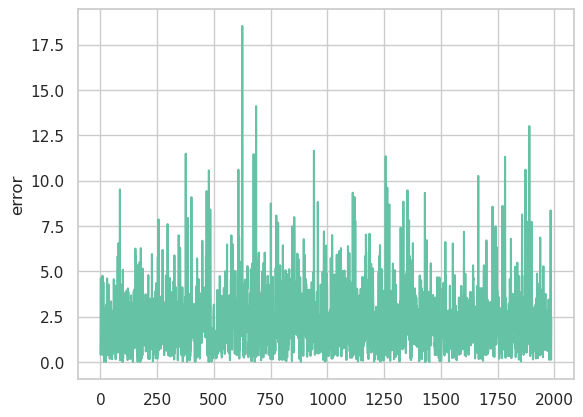

In [283]:
sns.lineplot(data=predict_df2, x=range(len(predict_df2)), y='error')

<AxesSubplot:xlabel='pred', ylabel='target'>

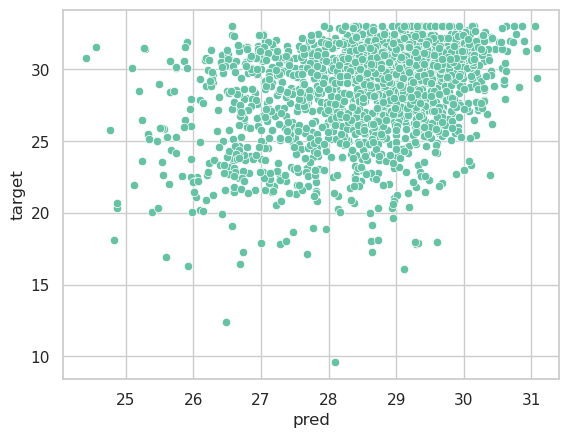

In [284]:
sns.scatterplot(data=predict_df2,x=predict_df2['pred'],y=predict_df2['target'])